# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic') 

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=137d797255e13b95cb1391c9d99df64f725f7a02d154bc5780f16a8fd352bae7
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [2]:
!pip install --upgrade gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 68.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527921 sha256=2fac7220d5d7fd8b6ce5946484d13736d85c6f41421df7ba668a49cd2ae9db99
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


### 1-2. 라이브러리 import

In [3]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-4. 구글드라이브 연결(Colab)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [5]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data = pd.read_csv(data_path)

In [6]:
data.shape

(3706, 2)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [7]:
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [9]:
data.describe()

,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


# 전처리

In [10]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

df = data.replace(label_dict)
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [11]:
# 정규 표현식을 통한 한글 외 문자 제거
df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-11-21066bec45cb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [12]:
df.head()

,text,label
0,여기서 커널사이즈 은 한 단어의 최대 길이가 이 넘지않는다는 가...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,를 사용할 때 질문입니다에 가 포함되면 제대로 작동하지 않는 것 같아 질문 드...,0
3,오류 어떻게 해결하면 좋을까요,0
4,이렇게 하면 안에 폴더 안에 이미지들이 저장 되는걸로 이해했는데이렇게...,0


In [13]:
from tqdm import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 MeCab을 사용한 토큰화 작업 (다소 시간 소요)
m = MeCab()

tokenized_data = []
for sentence in tqdm(df['text']):
    tokenized_sentence = m.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 3706/3706 [00:02<00:00, 1617.20it/s]


In [14]:
df['tokenized'] = tokenized_data

리뷰의 최대 길이 : 290
리뷰의 평균 길이 : 35.22800863464652


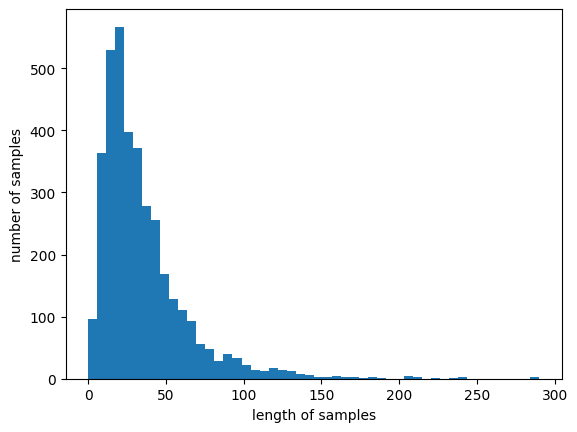

In [15]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Word to Vector

In [16]:
!unzip '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/ko.zip'

Archive:  /content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/ko.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


In [17]:
import gensim

In [18]:
ko_model = gensim.models.Word2Vec.load('ko.bin')

In [19]:
ko_model.wv.most_similar('코드')

[('기계어', 0.6557408571243286),
 ('컴파일러', 0.6464464068412781),
 ('명령어', 0.6312958002090454),
 ('스크립트', 0.6298861503601074),
 ('라이브러리', 0.6265060901641846),
 ('문자열', 0.6182523965835571),
 ('디버거', 0.5967888832092285),
 ('헤더', 0.5926225781440735),
 ('포인터', 0.5913186073303223),
 ('레지스터', 0.5903521776199341)]

In [20]:
ko_model.wv.vectors.shape

(30185, 200)

In [21]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    # index2word_set = set(model.wv.index_to_key)
    index2word_set = set(model.wv.index2word)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [22]:
x = get_dataset(tokenized_data, ko_model, 200)
x.shape

(3706, 200)

In [23]:
y = df['label']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023, stratify=y)

In [26]:
min_, max_ = x_train.min(), x_train.max()
x_train = (x_train - min_) / (max_ - min_)
x_test = (x_test - min_) / (max_ - min_)

# 모델

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

## 1) Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy :', accuracy_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73       317
           1       0.59      0.35      0.44       147
           2       0.66      0.53      0.59       146
           3       0.73      0.60      0.66       112
           4       1.00      0.05      0.10        20

    accuracy                           0.64       742
   macro avg       0.72      0.48      0.50       742
weighted avg       0.65      0.64      0.62       742

[[277  15  18   7   0]
 [ 74  51  14   8   0]
 [ 59   4  78   5   0]
 [ 28  10   7  67   0]
 [  6   7   1   5   1]]
Accuracy : 0.6388140161725068
F1 Score : 0.5013793709318174


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2) SVC

In [29]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy :', accuracy_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       317
           1       0.66      0.44      0.53       147
           2       0.69      0.59      0.64       146
           3       0.79      0.72      0.75       112
           4       0.89      0.40      0.55        20

    accuracy                           0.69       742
   macro avg       0.74      0.60      0.64       742
weighted avg       0.69      0.69      0.68       742

[[272  18  19   8   0]
 [ 61  65  12   8   1]
 [ 54   3  86   3   0]
 [ 17   7   7  81   0]
 [  3   6   0   3   8]]
Accuracy : 0.6900269541778976
F1 Score : 0.6444172094167108


## 3) LGBM

In [30]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=2023)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy :', accuracy_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74       317
           1       0.56      0.41      0.48       147
           2       0.73      0.55      0.63       146
           3       0.75      0.65      0.70       112
           4       1.00      0.20      0.33        20

    accuracy                           0.66       742
   macro avg       0.74      0.54      0.58       742
weighted avg       0.67      0.66      0.65       742

[[275  18  15   9   0]
 [ 68  61  10   8   0]
 [ 54   9  80   3   0]
 [ 25  11   3  73   0]
 [  1  10   1   4   4]]
Accuracy : 0.6644204851752021
F1 Score : 0.5758309300540339


## 4) RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=2023)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy :', accuracy_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.55      0.91      0.69       317
           1       0.51      0.22      0.30       147
           2       0.74      0.42      0.54       146
           3       0.80      0.46      0.58       112
           4       1.00      0.10      0.18        20

    accuracy                           0.59       742
   macro avg       0.72      0.42      0.46       742
weighted avg       0.63      0.59      0.55       742

[[290  14  11   2   0]
 [ 99  32   8   8   0]
 [ 81   3  62   0   0]
 [ 49  10   2  51   0]
 [ 10   4   1   3   2]]
Accuracy : 0.5889487870619946
F1 Score : 0.4581670344251288


# DL

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    df['tokenized'], df['label'], test_size=0.2, 
    random_state=2023, stratify=df['label'])

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(x_train)
x_train = tk.texts_to_sequences(x_train)
x_test = tk.texts_to_sequences(x_test)

In [35]:
len(tk.word_index)

5042

In [54]:
# word2vec에서 필요 단어만 추출
VOCAB_SIZE = len(tk.index_word) + 1
EMBEDDING_DIM = 200

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, idx in tk.word_index.items():
    embedding_vector = ko_model[word] if word in ko_model else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector

<ipython-input-54-7e8a17440d48>:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  embedding_vector = ko_model[word] if word in ko_model else None
<ipython-input-54-7e8a17440d48>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_vector = ko_model[word] if word in ko_model else None


In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200, padding='pre', truncating='post')
x_test = pad_sequences(x_test, maxlen=200, padding='pre', truncating='post')

In [45]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

seed = 42
my_seed_everywhere(seed)

In [44]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [56]:
# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(200,))
hl = Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], trainable=False)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Flatten()(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 200)          1008600   
                                                                 
 conv1d (Conv1D)             (None, 200, 64)           64064     
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 128)          41088     
                                                             

In [57]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=20, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=1000, callbacks=[es])

Epoch 1/1000
75/75 [==============================] - 16s 51ms/step - loss: 1.3181 - accuracy: 0.4310 - val_loss: 1.1738 - val_accuracy: 0.5059
Epoch 2/1000
75/75 [==============================] - 2s 21ms/step - loss: 1.0083 - accuracy: 0.5871 - val_loss: 0.9735 - val_accuracy: 0.6088
Epoch 3/1000
75/75 [==============================] - 2s 27ms/step - loss: 0.7690 - accuracy: 0.7081 - val_loss: 0.9395 - val_accuracy: 0.6341
Epoch 4/1000
75/75 [==============================] - 2s 25ms/step - loss: 0.5633 - accuracy: 0.7971 - val_loss: 1.0819 - val_accuracy: 0.6374
Epoch 5/1000
75/75 [==============================] - 1s 20ms/step - loss: 0.3903 - accuracy: 0.8612 - val_loss: 1.0563 - val_accuracy: 0.6459
Epoch 6/1000
75/75 [==============================] - 2s 20ms/step - loss: 0.3015 - accuracy: 0.9000 - val_loss: 1.2179 - val_accuracy: 0.6273
Epoch 7/1000
75/75 [==============================] - 2s 21ms/step - loss: 0.1834 - accuracy: 0.9443 - val_loss: 1.7192 - val_accuracy: 0.580

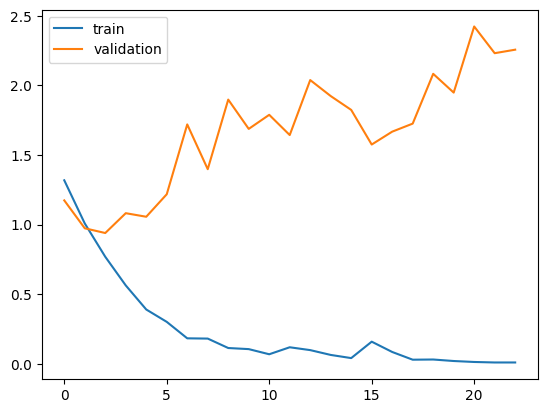

In [58]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()